In [86]:
from matplotlib import pyplot as plt     
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd
import numpy as np
%matplotlib notebook
from scipy.signal import lfilter

In [26]:
#목적 상으로는 parameter
amp = 1  #진폭 설정
sr = 10000 #sampling rate, 1초의 소리를 얼마나 고해상도로 하는가? -> 1초에 10000개의 숫자를 가지고 표현
dur = 0.5
freq = 100.0  #100바퀴를 만들어라

In [27]:
t 0.0001 0.0002 0.0003 0.0004 ... 0.5000

SyntaxError: invalid syntax (<ipython-input-27-ca130cf42cbc>, line 1)

In [28]:
t = np.arange(1,sr*dur+1)  #+1은 마지막 숫자를 포함하기 위해서 필요함
t

array([1.000e+00, 2.000e+00, 3.000e+00, ..., 4.998e+03, 4.999e+03,
       5.000e+03])

In [29]:
t = np.arange(1,sr*dur+1)/sr    
t

array([1.000e-04, 2.000e-04, 3.000e-04, ..., 4.998e-01, 4.999e-01,
       5.000e-01])

1.000e-04 = e-04: 10의 4승 분의 1  --> 1곱하기 만분의 1

2.000e-04: 2곱하기 만분의 1

4.998e-01: 4.998 곱하기 10분의 1

In [30]:
theta = t * 2*np.pi * freq    #pi는 np 속에 정의되어있기 때문에 np 써야함.
                             #2np.pi는 1바퀴이기 떄문에 200의 freq를 곱하여 200바퀴 돌아가게 함.

In [31]:
s = np.sin(theta)

time에 있는 벡터의 사이즈와 theta의 벡터의 사이즈는 같다?
당연히 같음.
10000분의 1초부터 10000분의 5000초까지 만든 상태에서, 단순히 곱하기만을 한 상태이므로 사이즈는 똑같다.

<IPython.core.display.Javascript object>


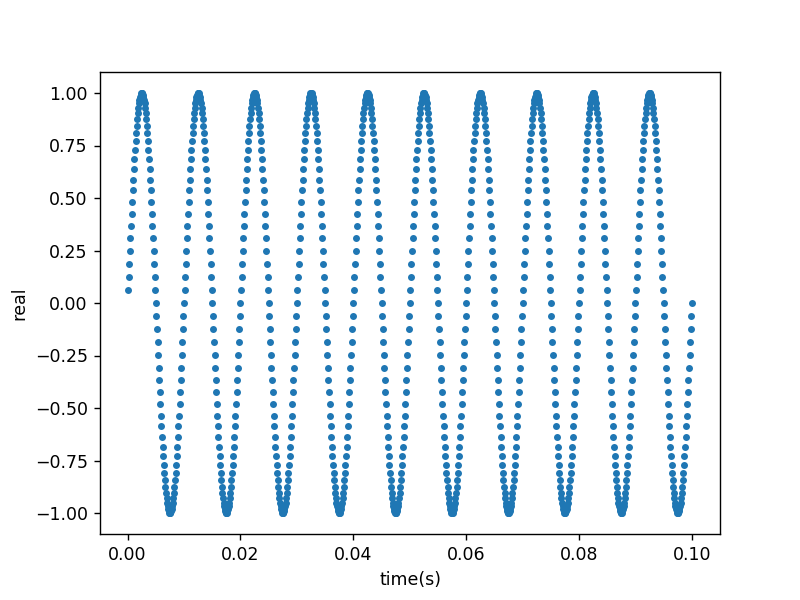

Text(0, 0.5, 'real')

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000], '.')  #t를 넣어서 x축으로 하고, s를 넣어서 y축으로 해라.'.'은 .으로 그래프를  만들라는 것.
ax.set_xlabel('time(s)')
ax.set_ylabel('real')

5000개 다 한것이 아니라 1000개만.
sin곡선을 썼기 때문에 0부터 시작함.

time을 넣는 이유는 phasor 함수들이 받아들이는 것이 각도값(radian)인데, 그것만 가지고는 실체의 소리를 만들 수 없음.

In [33]:
theta = np.arange(0, 2*np.pi)
theta

array([0., 1., 2., 3., 4., 5., 6.])

In [34]:
s = np.sin(theta)
s

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ])

<IPython.core.display.Javascript object>


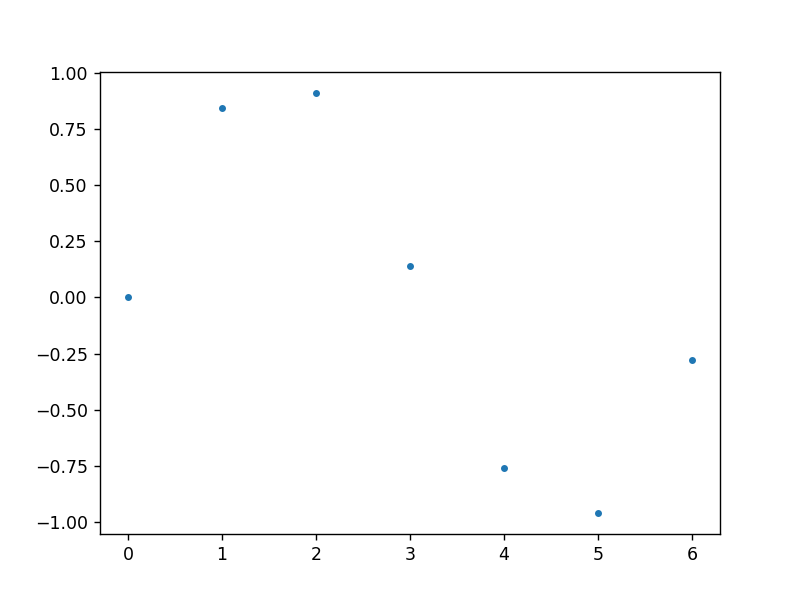

In [35]:
fig = plt.figure()    #plt 라이브러리 속에 있는 figure이라는 함수를 사용
ax = fig.add_subplot(111)
ax.plot(theta, s, '.')

<IPython.core.display.Javascript object>


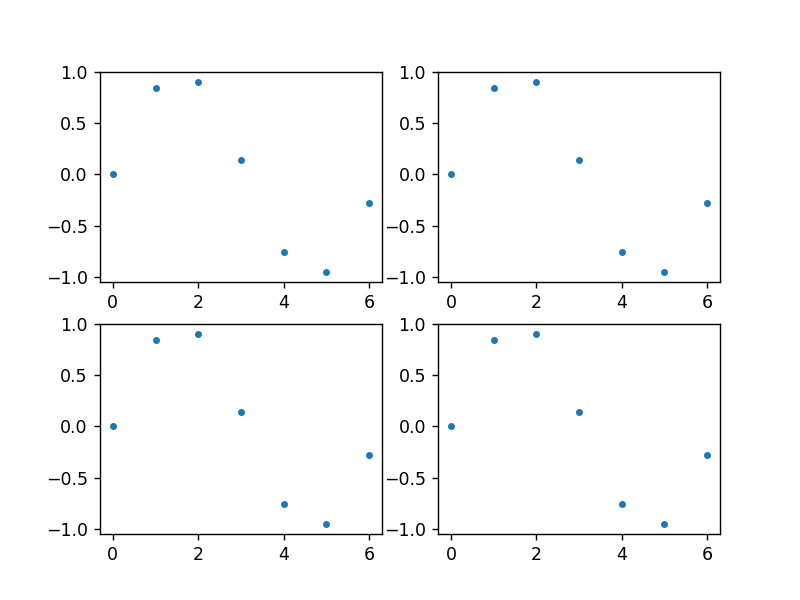

In [36]:
fig = plt.figure() 
ax = fig.add_subplot(221)   #221은 2 by 2 (2행 2열)로 화면 분리를 하고 1 사분면을 선택.
ax.plot(theta, s, '.')
ax = fig.add_subplot(222)
ax.plot(theta, s, '.')
ax = fig.add_subplot(223)
ax.plot(theta, s, '.')
ax = fig.add_subplot(224)
ax.plot(theta, s, '.')
#0부터 시작하기 때문에 sin 함수임을 알 수 있음.

In [37]:
theta = np.arange(0, 2*np.pi, 0.1)   #디폴트 값은 1인데, 0.1로 더 빽빽하게 설정한 것.

In [38]:
s = np.sin(theta)

<IPython.core.display.Javascript object>


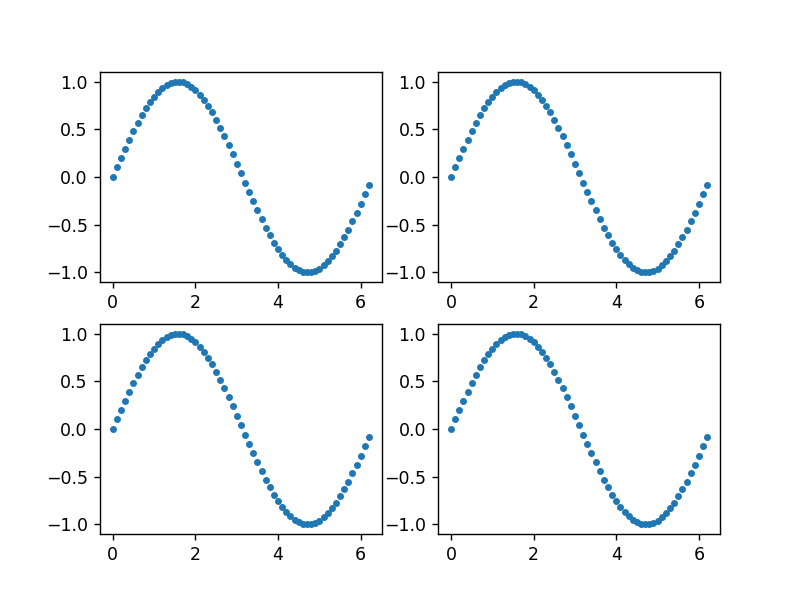

In [39]:
fig = plt.figure() 
ax = fig.add_subplot(221)
ax.plot(theta, s, '.')
ax = fig.add_subplot(222)
ax.plot(theta, s, '.')
ax = fig.add_subplot(223)
ax.plot(theta, s, '.')
ax = fig.add_subplot(224)
ax.plot(theta, s, '.')

<IPython.core.display.Javascript object>


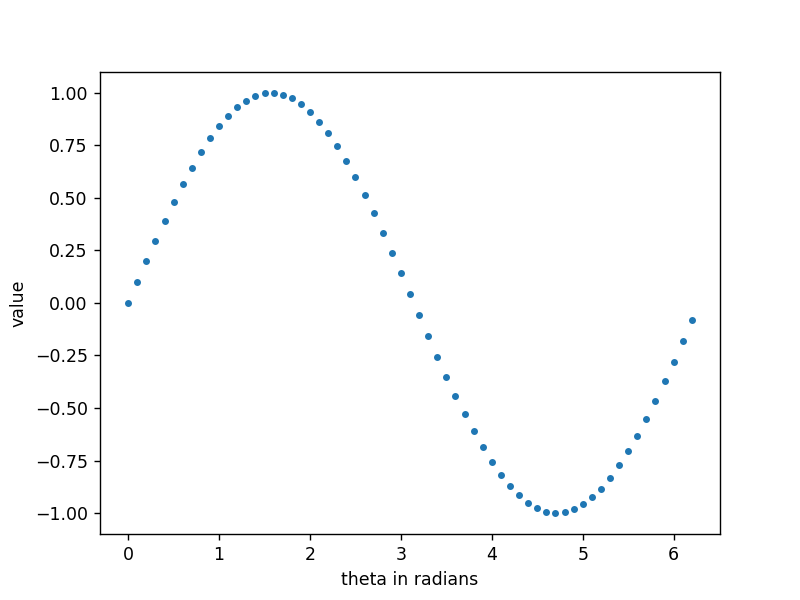

Text(0, 0.5, 'value')

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(theta, s, '.')
ax.set_xlabel('theta in radians')
ax.set_ylabel('value')

x축에서는 등간격, y축에서는 등간격 아님.

둘 다 등간격이려면 linear이어야 함.(선 처럼 생긴 것)

linear: 함수 x,y의 관계가 일차함수처럼 생긴 것. 라인의 형태로 나타나는 것.

위와 같은 그래프는 non - linear라고 한다.

<IPython.core.display.Javascript object>


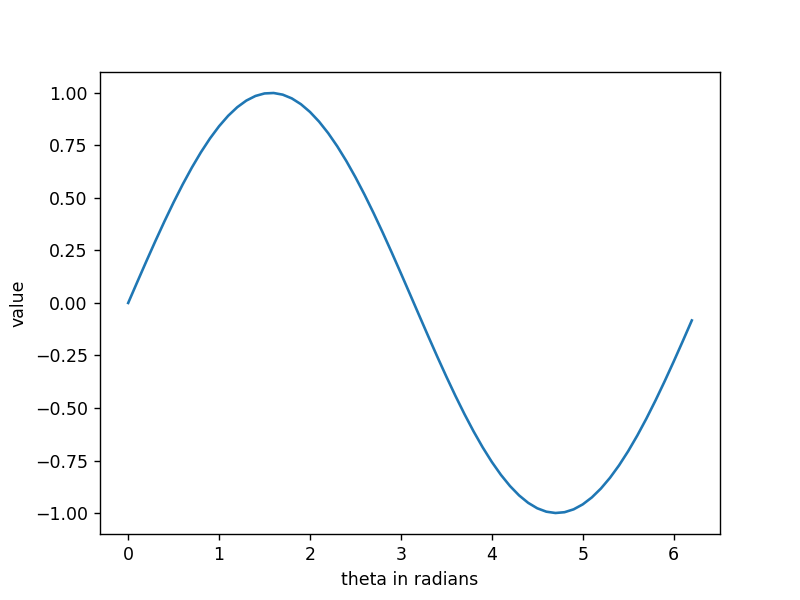

Text(0, 0.5, 'value')

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(theta, s)    #그래프 구성의 디폴트 값은 선
ax.set_xlabel('theta in radians')
ax.set_ylabel('value')

In [45]:
theta = np.arange(0, 2*np.pi*5,0.1)

In [47]:
s = np.sin(theta)

<IPython.core.display.Javascript object>


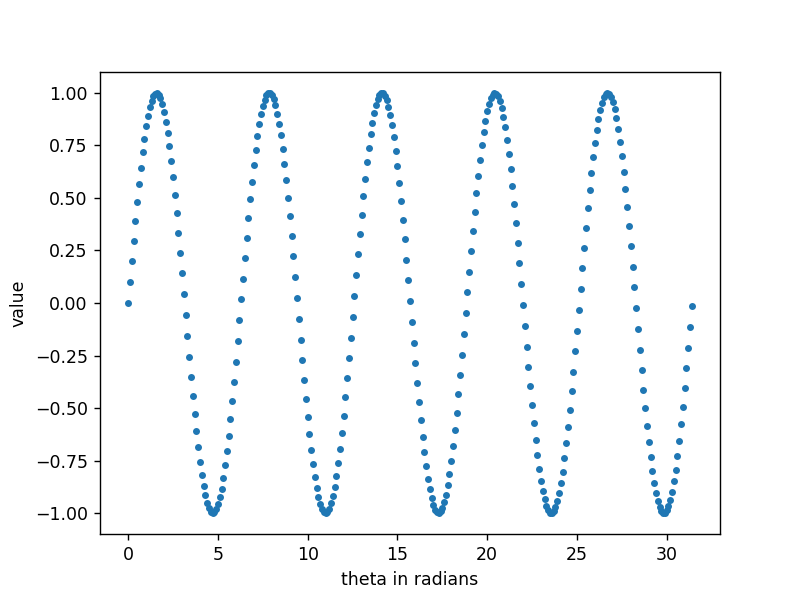

Text(0, 0.5, 'value')

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(theta, s, '.')
ax.set_xlabel('theta in radians')
ax.set_ylabel('value')

이제까지의 그래프에는 시간이 빠져있기 때문에 소리를 만들 수 없음.

시간을 넣는 방법은 시간을 가장 먼저 만드는 것.

In [98]:
amp = 1
sr = 10000 
dur = 0.5 
freq = 200.0  

In [99]:
t = np.arange(1,sr*dur+1)/sr    #time tic의 갯수는 sr과 동일함.
                                #sr로 나누는 이유는 초로 다시 변환하기 위해서

In [100]:
theta = t * 2*np.pi * freq  #freq 없으면 1바퀴, 있으니까 1초에 200바퀴

In [101]:
s = np.sin(theta)

<IPython.core.display.Javascript object>


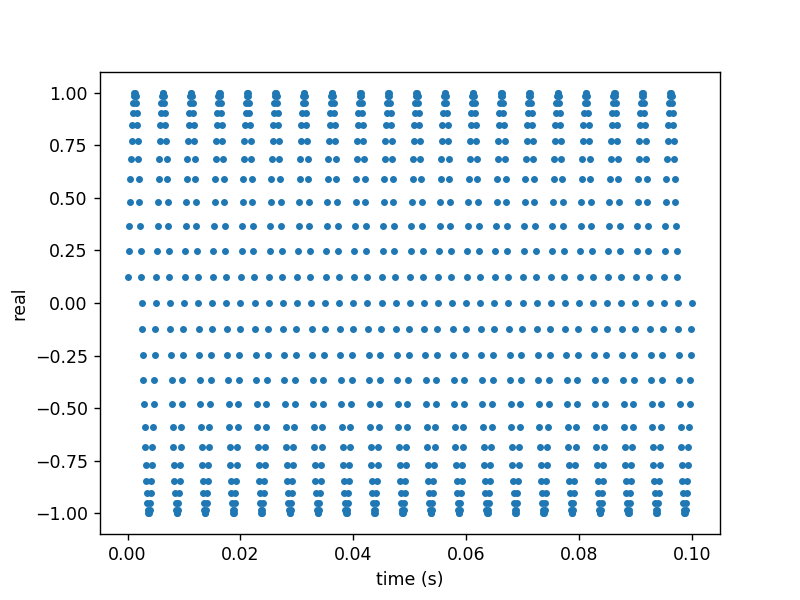

Text(0, 0.5, 'real')

In [102]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000], '.')    #t와 s의 갯수는 똑같아야함.
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

x축에 theta가 없는 이유는 굳이 쓰지 않아도 알 수 있기 때문.

점들의 갯수: 1000개

<IPython.core.display.Javascript object>


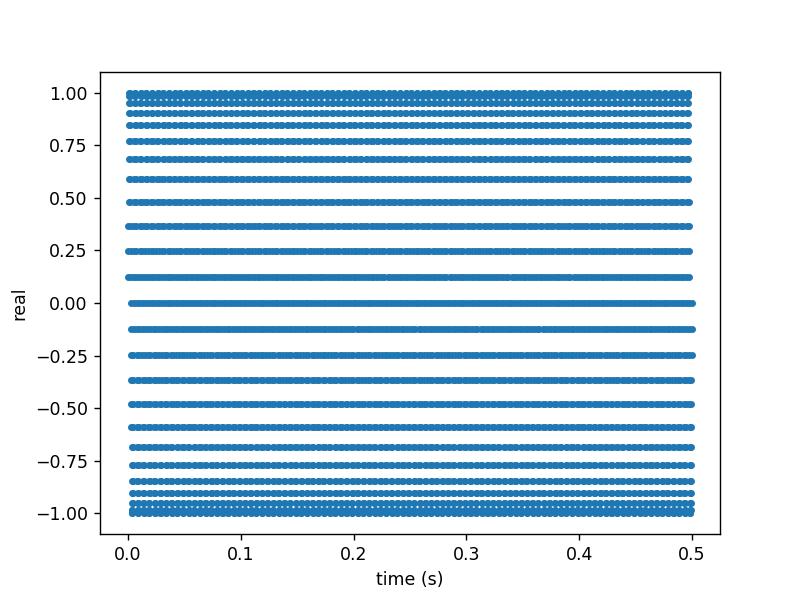

Text(0, 0.5, 'real')

In [69]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t, s, '.')    
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

<IPython.core.display.Javascript object>


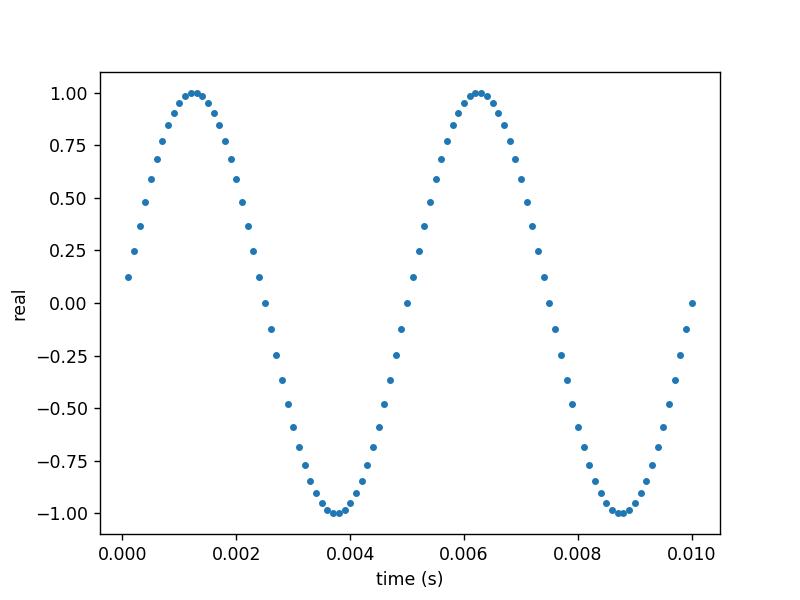

Text(0, 0.5, 'real')

In [71]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:100], s[0:100], '.')    
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

In [80]:
c = np.exp(theta*1j)    #j = 허수 i
c                       #sin과 마찬가지로 theta가 변수

array([0.9921147 +1.25333234e-01j, 0.96858316+2.48689887e-01j,
       0.92977649+3.68124553e-01j, ..., 0.96858316-2.48689887e-01j,
       0.9921147 -1.25333234e-01j, 1.        +3.92877345e-15j])

복소수니까 a + bi의 형태로 표현됨

<IPython.core.display.Javascript object>


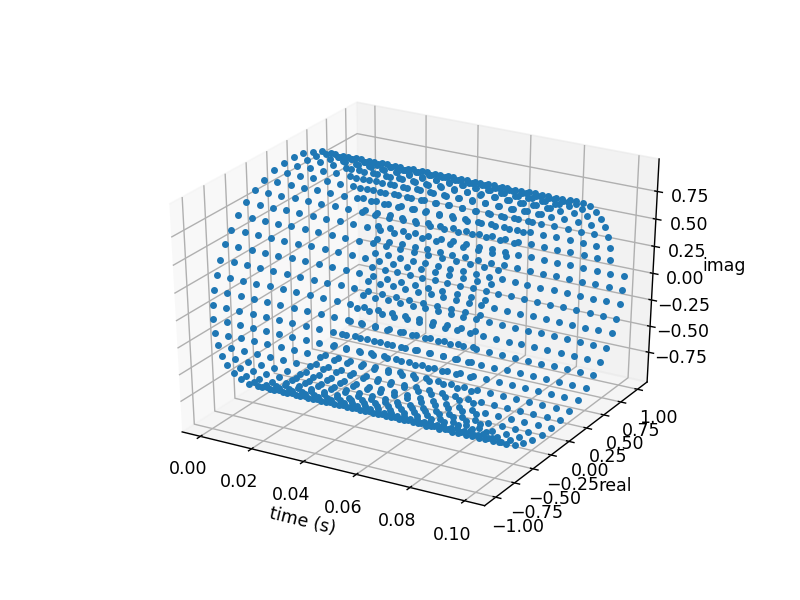

Text(0.5, 0, 'imag')

In [93]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')

c.real - c라는 복소수에서 실수값만 빼오는 것

c.imag - c라는 복소수에서 허수값만 빼오는 것

<IPython.core.display.Javascript object>


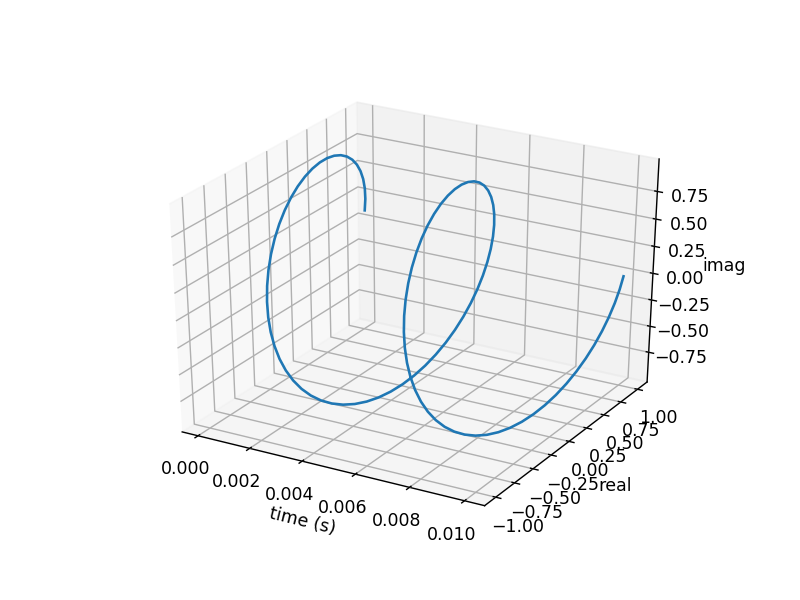

Text(0.5, 0, 'imag')

In [91]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t[0:100], c.real[0:100], c.imag[0:100])
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')

오일러 공식에서 sin부분은 imag, cos부분은 real

real만 보면 cos그래프, imag만 보면 sin그래프와 일치

In [103]:
ipd.Audio(c.real, rate = sr)